In [2]:
%cd F:\My_projects\Learning\Python_imageProcessing

F:\My_projects\Learning\Python_imageProcessing


f:\My_projects\Learning\Python_imageProcessing\venv3.9\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Discrete Fourier Transform

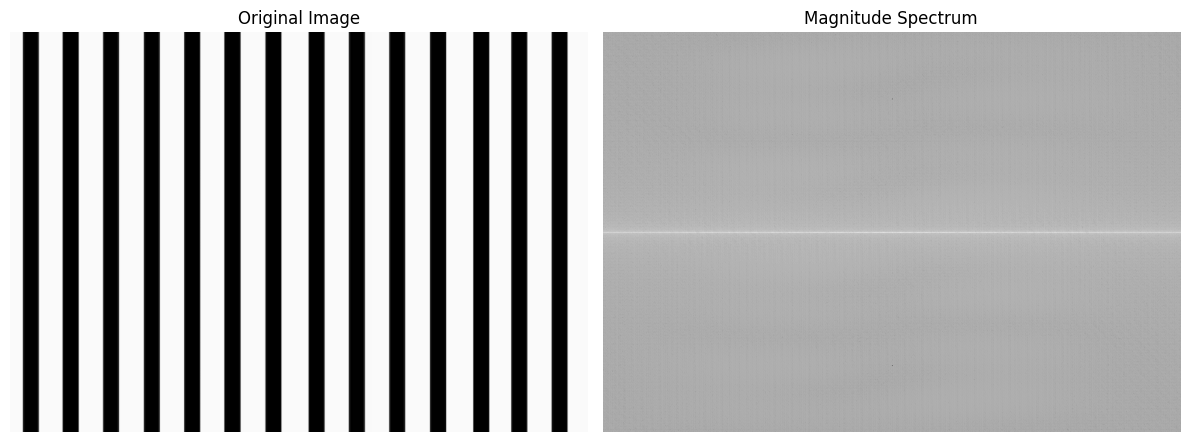

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('b1.png', cv2.IMREAD_GRAYSCALE)

# Perform the Fourier Transform
f_transform = np.fft.fft2(image) # FFT = Fast Fourier Transform

# Shift the zero frequency component (DC component) to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum =  np.log(np.abs(f_transform_shifted))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# high freq.

### Inverse Fourier Transform

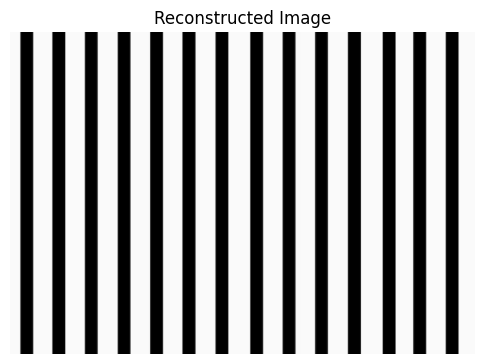

In [9]:
# Perform the inverse shift
f_transform_shifted_back = np.fft.ifftshift(f_transform_shifted)

# Perform the Inverse Fourier Transform
image_back = np.fft.ifft2(f_transform_shifted_back)

# Take the real part of the inverse transform
image_back = np.abs(image_back)

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


### DFT with bilateral filter

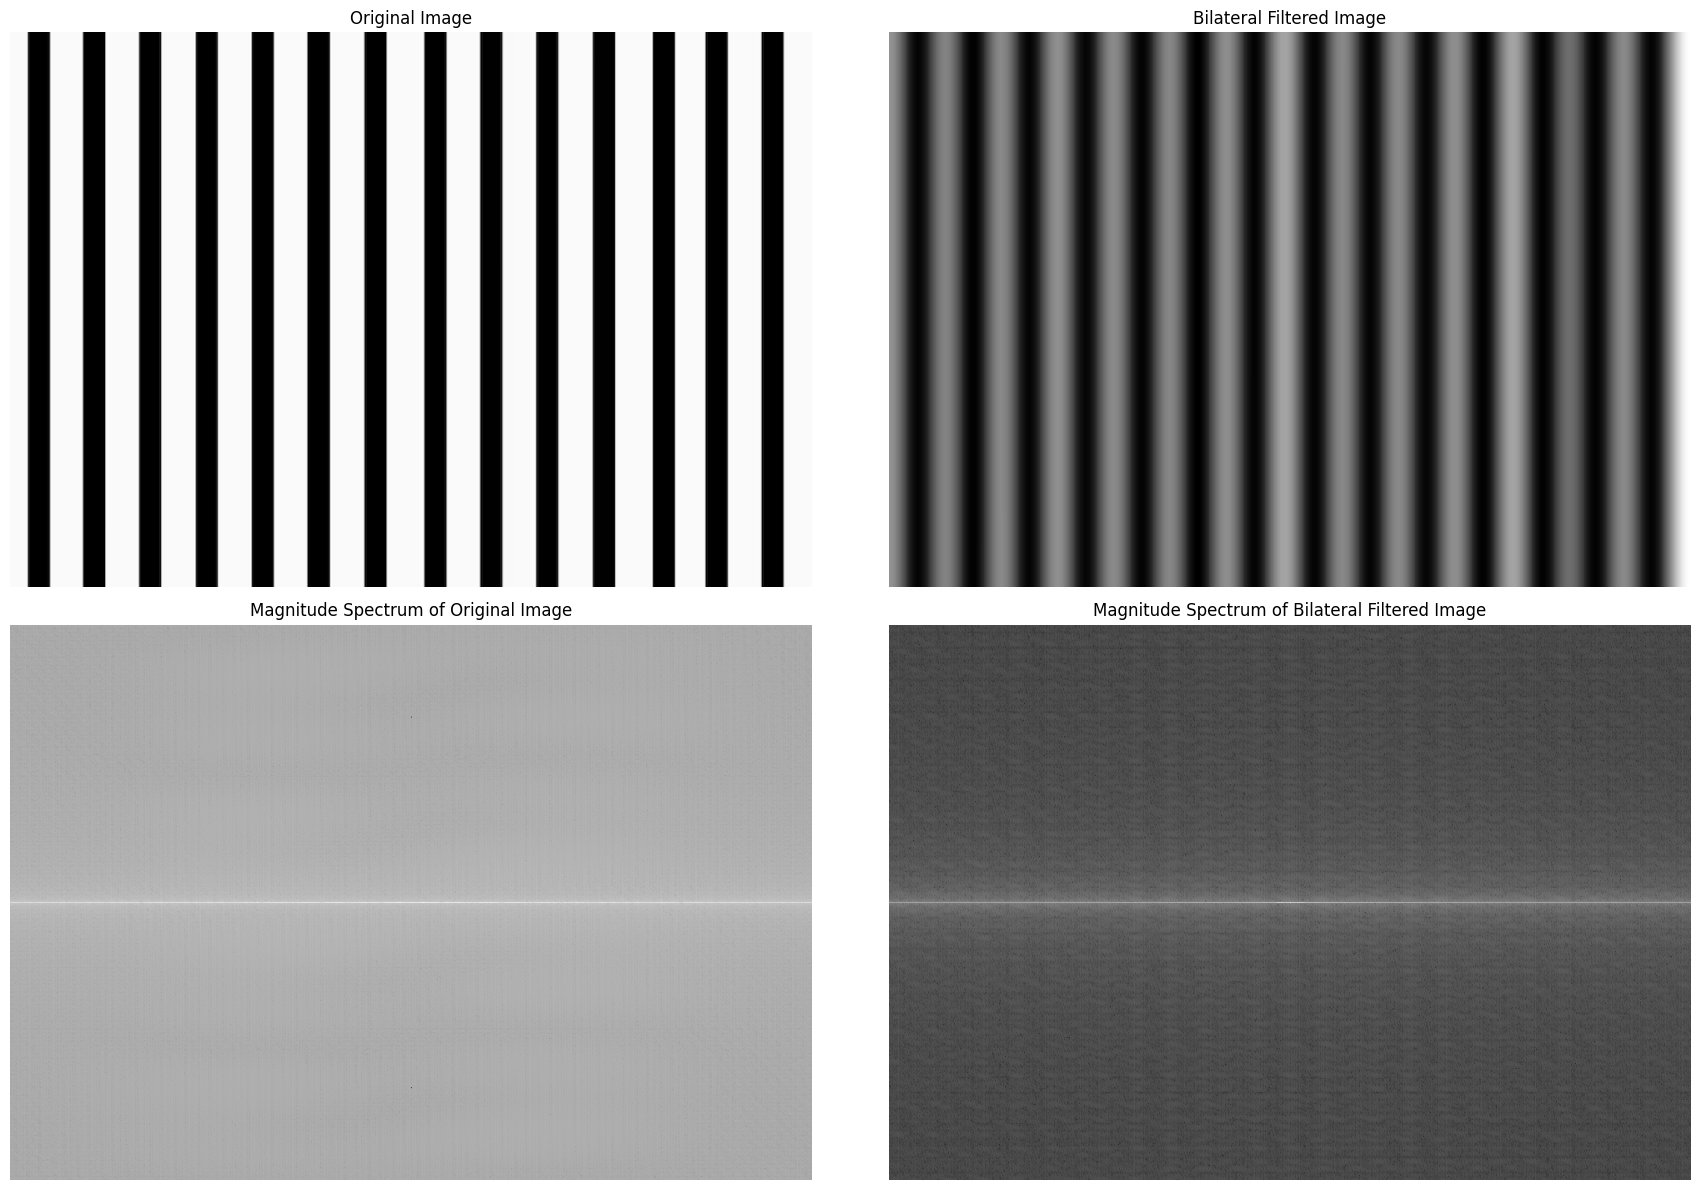

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('b1.png', cv2.IMREAD_GRAYSCALE)

# Apply bilateral filter
# Parameters: source image, diameter, sigmaColor, sigmaSpace
bilateral_filtered_image = cv2.bilateralFilter(image, d=100, sigmaColor=1000, sigmaSpace=20)

# Perform the Fourier Transform on the original and filtered images
f_transform_original = np.fft.fft2(image)
f_transform_filtered = np.fft.fft2(bilateral_filtered_image)

# Shift the zero frequency component (DC component) to the center
f_transform_original_shifted = np.fft.fftshift(f_transform_original)
f_transform_filtered_shifted = np.fft.fftshift(f_transform_filtered)

# Compute the magnitude spectrum
magnitude_spectrum_original = 20 * np.log(np.abs(f_transform_original_shifted))
magnitude_spectrum_filtered = 20 * np.log(np.abs(f_transform_filtered_shifted))

# Display the images
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum of Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Magnitude Spectrum of Bilateral Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### DFT in mathematical way

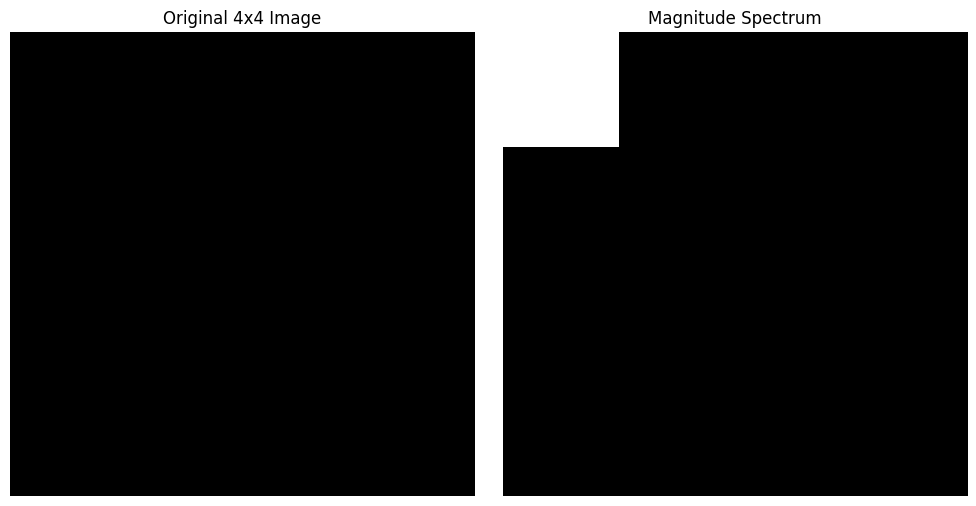

Original 4x4 Image:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

Manually Defined DFT Kernel:
 [[16.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

Magnitude Spectrum:
 [[16.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 4x4 grayscale image
image = np.array([[1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1]], dtype=np.uint8)

# Manually define the DFT kernel
manual_kernel = np.array([[1,  1,  1,  1],
                          [1, -1j, -1,  1j],
                          [1, -1,  1, -1],
                          [1,  1j, -1, -1j]])

# Compute the DFT using the manually defined kernel
dft = np.dot(manual_kernel, np.dot(image, manual_kernel.T))

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(dft)

# Display the original image and the magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original 4x4 Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the original image, the manually defined DFT kernel, and the DFT result for reference
print("Original 4x4 Image:\n", image)
print("\nManually Defined DFT Kernel:\n", dft)
print("\nMagnitude Spectrum:\n", magnitude_spectrum)


In [15]:
product = np.dot(manual_kernel, image)
print(product)

[[4.+0.j 4.+0.j 4.+0.j 4.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [16]:
transpose = manual_kernel.T
print(transpose)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]
 [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]]


In [17]:
Fuv = np.dot(product, transpose)
print(np.abs(Fuv))

[[16.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


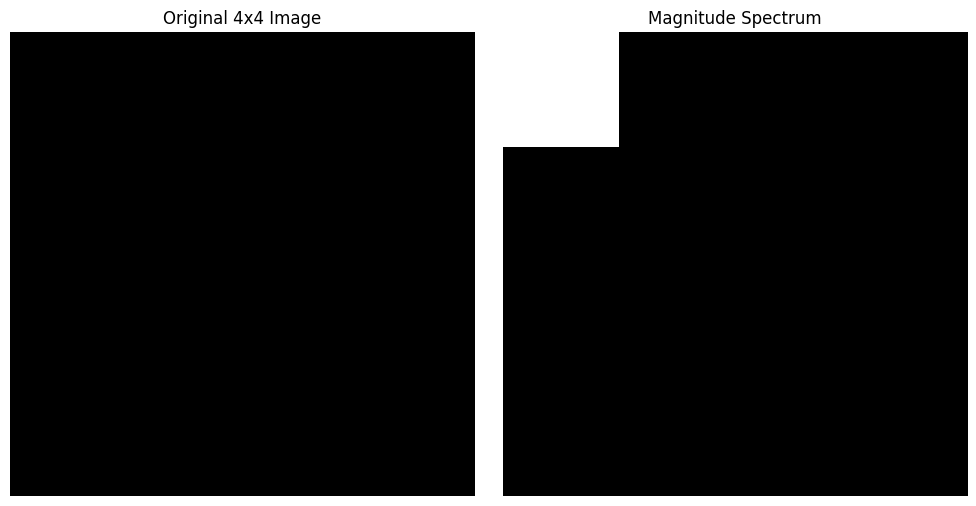

Original 4x4 Image:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

DFT Kernel:
 [['1.0' '1.0' '1.0' '1.0']
 ['1.0' '0.0 + -1.0j' '-1.0 + -0.0j' '-0.0 + 1.0j']
 ['1.0' '-1.0 + -0.0j' '1.0 + 0.0j' '-1.0 + -0.0j']
 ['1.0' '-0.0 + 1.0j' '-1.0 + -0.0j' '0.0 + -1.0j']]

DFT of the Image:
 [[ 1.60000000e+01+0.00000000e+00j -7.34788079e-16-8.88178420e-16j
   0.00000000e+00-9.79717439e-16j  1.31618582e-15-1.33226763e-15j]
 [-7.34788079e-16-8.88178420e-16j -1.55592115e-32+6.54408355e-32j
  -4.93038066e-32+4.49927935e-32j -1.09748660e-31+1.18795917e-32j]
 [ 0.00000000e+00-9.79717439e-16j -5.43852429e-32+4.49927935e-32j
  -5.99903913e-32+0.00000000e+00j -8.15778644e-32-8.05931375e-32j]
 [ 1.31618582e-15-1.33226763e-15j -1.50537592e-31+8.92719831e-34j
  -9.86076132e-32-8.56745739e-32j  3.34231396e-32-2.32854001e-31j]]

Magnitude Spectrum:
 [[1.60000000e+01 1.15272478e-15 9.79717439e-16 1.87277392e-15]
 [1.15272478e-15 6.72650876e-32 6.67474105e-32 1.10389732e-31]
 [9.79717439e-16 7.05840358e-32 5.9

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 4x4 grayscale image
image = np.array([[1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1]], dtype=np.uint8)

# Function to compute the DFT kernel for N=4
def dft_kernel(n):
    kernel = np.zeros((n, n), dtype=complex)
    for u in range(n):
        for x in range(n):
            kernel[u, x] = np.exp(-2j * np.pi * u * x / n)
    return kernel

# Compute the DFT kernel for a 4x4 image
kernel = dft_kernel(4)

# Adjust the kernel for better visualization
adjusted_kernel = np.zeros((4, 4), dtype=object)
for i in range(4):
    for j in range(4):
        real = kernel[i, j].real
        imag = kernel[i, j].imag
        if imag == 0:
            adjusted_kernel[i, j] = f"{real:.1f}"
        elif real == 0:
            adjusted_kernel[i, j] = f"{imag:.1f}j"
        else:
            adjusted_kernel[i, j] = f"{real:.1f} + {imag:.1f}j"

# Compute the DFT using the kernel
dft = np.dot(kernel, np.dot(image, kernel.T))

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(dft)

# Display the original image and the magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original 4x4 Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the original image, the DFT kernel, and the DFT result for reference
print("Original 4x4 Image:\n", image)
print("\nDFT Kernel:\n", adjusted_kernel)
print("\nDFT of the Image:\n", dft)
print("\nMagnitude Spectrum:\n", magnitude_spectrum)


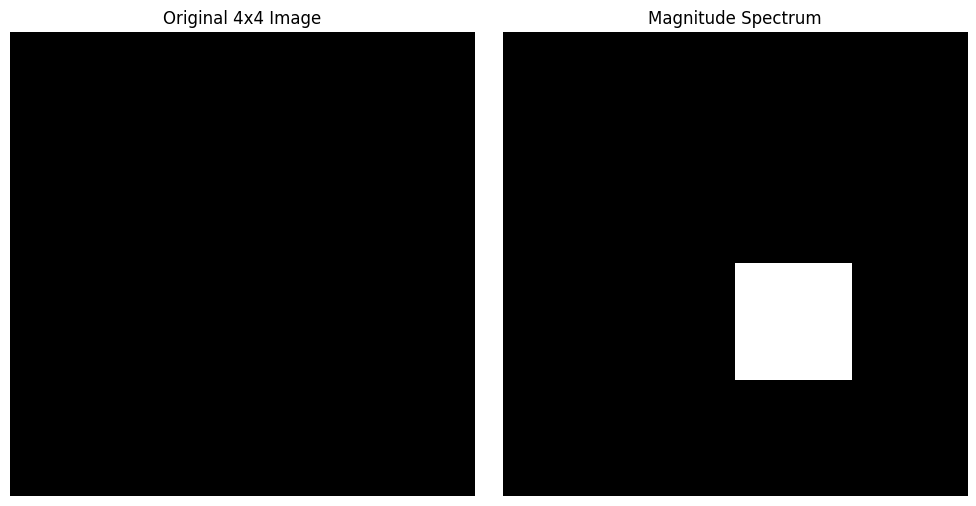

Original 4x4 Image:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

DFT of the Image:
 [[16.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

Shifted DFT of the Image:
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j 16.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

Magnitude Spectrum:
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. 16.  0.]
 [ 0.  0.  0.  0.]]


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 4x4 grayscale image
image = np.array([[1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1],
                  [1, 1, 1, 1]], dtype=np.uint8)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(f_transform_shifted)

# Display the original image and the magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original 4x4 Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the original image and its Fourier Transform result for reference
print("Original 4x4 Image:\n", image)
print("\nDFT of the Image:\n", f_transform)
print("\nShifted DFT of the Image:\n", f_transform_shifted)
print("\nMagnitude Spectrum:\n", magnitude_spectrum)
